In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as layers

train_data = "Fruits_Vegetables/train"
test_data = "Fruits_Vegetables/test"
validation_data = "Fruits_Vegetables/validation"

width_i = 180
height_i = 180

In [3]:
data_train = keras.utils.image_dataset_from_directory(
    train_data,
    shuffle=True,
    image_size=(width_i, height_i),
    batch_size=32,
    validation_split=False,
)

Found 2708 files belonging to 29 classes.


In [4]:
validation_data = keras.utils.image_dataset_from_directory(
    validation_data,
    image_size=(height_i, width_i),
    batch_size=32,
    shuffle=False,
    validation_split=False,
)

Found 448 files belonging to 29 classes.


In [5]:
category = data_train.class_names
category

['apple',
 'banana',
 'beetroot',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'soy beans',
 'sweetcorn',
 'sweetpotato',
 'tomato']

In [5]:
data_test = keras.utils.image_dataset_from_directory(
    image_size=(height_i, width_i),
    batch_size=32,
    shuffle=False,
    validation_split=False,
    directory=test_data,
)

Found 761 files belonging to 29 classes.


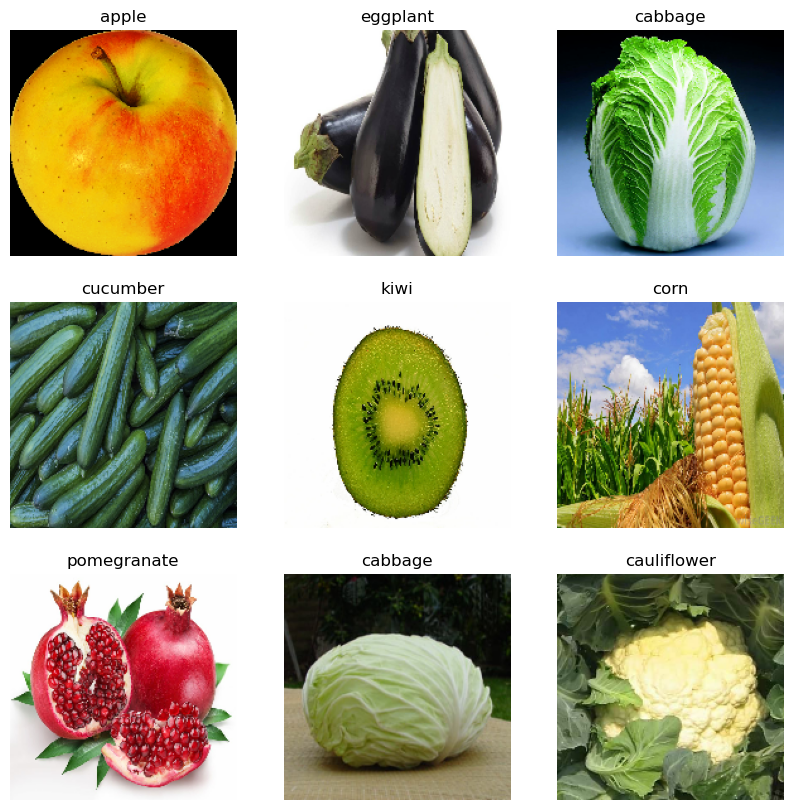

In [6]:
plt.figure(figsize=(10, 10))
for img, lbl in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(category[lbl[i]])
        plt.axis("off")

In [8]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128),
    layers.Dense(units=len(category))
])

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
epochs_size = 25
history = model.fit(data_train, validation_data=validation_data, epochs=epochs_size)

Epoch 1/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 29s 268ms/step - accuracy: 0.0563 - loss: 4.0660 - val_accuracy: 0.1280 - val_loss: 3.2627
Epoch 2/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.2726 - loss: 2.5913 - val_accuracy: 0.2681 - val_loss: 3.6425
Epoch 3/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 259ms/step - accuracy: 0.4925 - loss: 1.7618 - val_accuracy: 0.4251 - val_loss: 3.8980
Epoch 4/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.7326 - loss: 0.9919 - val_accuracy: 0.4493 - val_loss: 5.4159
Epoch 5/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.8477 - loss: 0.5185 - val_accuracy: 0.4686 - val_loss: 6.6699
Epoch 6/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 259ms/step - accuracy: 0.9123 - loss: 0.2968 - val_accuracy: 0.4686 - val_loss: 8.4671
Epoch 7/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.9478 - loss: 0.2069 - val_accuracy: 0.4879 - val_loss: 8.4924
Epoch 8/25
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 254ms/step - accuracy: 0.9701 - loss: 0.1438 - val_accu

Text(0.5, 1.0, 'Loss')

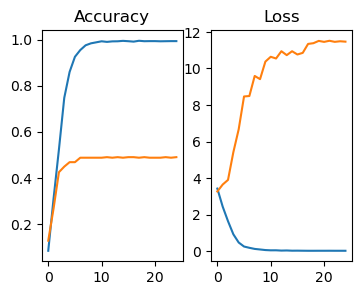

In [10]:
epochs_range = range(epochs_size)
plt.figure(figsize=(4,3))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [11]:
image = 'apple.jpeg'
image = tf.keras.utils.load_img(image, target_size=(height_i,width_i))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [12]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Vegetable / Fruit in image is {} with accuracy of {:0.2f}%'.format(category[np.argmax(score)],np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Vegetable / Fruit in image is apple with accuracy of 100.00%


In [13]:
model.save('imageClassify.keras')